# Survival analysis

## Import Libaries

In [137]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from lifelines import KaplanMeierFitter
cf.go_offline()
from scipy.spatial.distance import pdist, squareform


## Import Dataset

In [138]:
df=pd.read_csv('../csv/DF_incl_RFM.csv')

In [139]:
df.dtypes

Date                    object
Customer_ID             object
Customer_Name           object
Segment                 object
City                    object
Country                 object
Market                  object
Product_ID              object
Category                object
Sub_Category            object
Product_Name            object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
Shipping Cost          float64
Sales_ohne_Discount    float64
Frequency                int64
Monetary               float64
Recency                  int64
BillMonth               object
CohortMonth             object
Month_index              int64
index                    int64
Frequency_qcut           int64
Recency_qcut             int64
Monetary_qcut            int64
label                    int64
dtype: object

## Data Analysis

In [140]:
df.columns

Index(['Date', 'Customer_ID', 'Customer_Name', 'Segment', 'City', 'Country',
       'Market', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Sales_ohne_Discount', 'Frequency', 'Monetary', 'Recency', 'BillMonth',
       'CohortMonth', 'Month_index', 'index', 'Frequency_qcut', 'Recency_qcut',
       'Monetary_qcut', 'label'],
      dtype='object')

I create a new column that I will use for the amount of days a customer is already a customer of the online shop. The column will be introduced now. Once the dataset will be grouped by Customer, we will use the max() amount of Days as a customer to have the relationship between customer and Online Shop in days. 

In [141]:
df['Days_as_customer']=df['Recency']

In [142]:
df.Recency.max()

1460

Now we will group the dataframe by customer ID to get insights for each customer.

In [143]:
df_gr_ID=df.groupby(['Customer_ID', 'Customer_Name','Segment'], as_index=False).agg({'Profit':'sum', 'Shipping Cost': 'sum', 'Frequency':'sum', 'Monetary':'sum', 'Recency':'min','Frequency_qcut':'mean', 'Recency_qcut':'mean','Monetary_qcut':'mean','Days_as_customer':'max','label':'mean'})

In [144]:
df_gr_ID

,Customer_ID,Customer_Name,Segment,Profit,Shipping Cost,Frequency,Monetary,Recency,Frequency_qcut,Recency_qcut,Monetary_qcut,Days_as_customer,label
0,AA-10315,Alex Avila,Consumer,447.69050,1236.15,42,13747.41300,8,4,5,4,1371,1
1,AA-10375,Allen Armold,Consumer,677.47740,903.92,42,5884.19500,6,4,5,3,1350,1
2,AA-10480,Andrew Allen,Consumer,1516.47518,1633.67,38,17695.58978,117,3,2,5,1450,1
3,AA-10645,Anna Andreadi,Consumer,3051.43900,1752.27,73,15343.89070,26,5,4,5,1449,1
4,AA-315,Alex Avila,Consumer,535.56600,215.80,8,2243.25600,2,1,5,2,1243,0
5,AA-375,Allen Armold,Consumer,77.44200,118.70,13,654.49200,181,2,1,1,1455,2
6,AA-480,Andrew Allen,Consumer,554.61300,181.60,10,2063.49300,314,1,1,2,1289,2
7,AA-645,Anna Andreadi,Consumer,-608.34600,209.00,18,1968.32400,81,3,2,2,1349,2
8,AB-10015,Aaron Bergman,Consumer,3719.48800,2897.51,77,20037.49750,16,5,4,5,1411,1
9,AB-10060,Adam Bellavance,Home Office,4514.05890,2284.67,57,18416.55040,25,5,4,5,1455,1


I decided to remove all the customers that have a frequency=1. It is hard to say if a customer that only bought something once will be a churn if he never came back. So therefore I reduced it by the customers with value 1. 

In [145]:
df_gr_ID=df_gr_ID[df_gr_ID.Frequency>1]

In [146]:
#average recency is 80days. So therefore I took half a year as the measure for the churn. 
df_gr_ID['Attrition']=np.where(df_gr_ID.Recency>180,0,1)

## Survival graphs by customer

In [147]:
def survival(data, group_field, time_field, event_field):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        kmf.fit(T, E, label=str(i))
        results.append(kmf.survival_function_)

    survival = pd.concat(results, axis=1)
    front_fill = survival.fillna(method='ffill')
    back_fill = survival.fillna(method='bfill')
    smoothed = (front_fill + back_fill) / 2
    return smoothed

In [148]:
df_gr_ID.head()

,Customer_ID,Customer_Name,Segment,Profit,Shipping Cost,Frequency,Monetary,Recency,Frequency_qcut,Recency_qcut,Monetary_qcut,Days_as_customer,label,Attrition
0,AA-10315,Alex Avila,Consumer,447.69050,1236.15,42,13747.41300,8,4,5,4,1371,1,1
1,AA-10375,Allen Armold,Consumer,677.47740,903.92,42,5884.19500,6,4,5,3,1350,1,1
2,AA-10480,Andrew Allen,Consumer,1516.47518,1633.67,38,17695.58978,117,3,2,5,1450,1,1
3,AA-10645,Anna Andreadi,Consumer,3051.43900,1752.27,73,15343.89070,26,5,4,5,1449,1,1
4,AA-315,Alex Avila,Consumer,535.56600,215.80,8,2243.25600,2,1,5,2,1243,0,1


In [149]:
df_gr_ID['Shipping Cost']=round(df_gr_ID['Shipping Cost']/df_gr_ID.Frequency)

In [150]:
df_gr_ID

,Customer_ID,Customer_Name,Segment,Profit,Shipping Cost,Frequency,Monetary,Recency,Frequency_qcut,Recency_qcut,Monetary_qcut,Days_as_customer,label,Attrition
0,AA-10315,Alex Avila,Consumer,447.69050,29.0,42,13747.41300,8,4,5,4,1371,1,1
1,AA-10375,Allen Armold,Consumer,677.47740,22.0,42,5884.19500,6,4,5,3,1350,1,1
2,AA-10480,Andrew Allen,Consumer,1516.47518,43.0,38,17695.58978,117,3,2,5,1450,1,1
3,AA-10645,Anna Andreadi,Consumer,3051.43900,24.0,73,15343.89070,26,5,4,5,1449,1,1
4,AA-315,Alex Avila,Consumer,535.56600,27.0,8,2243.25600,2,1,5,2,1243,0,1
5,AA-375,Allen Armold,Consumer,77.44200,9.0,13,654.49200,181,2,1,1,1455,2,0
6,AA-480,Andrew Allen,Consumer,554.61300,18.0,10,2063.49300,314,1,1,2,1289,2,0
7,AA-645,Anna Andreadi,Consumer,-608.34600,12.0,18,1968.32400,81,3,2,2,1349,2,1
8,AB-10015,Aaron Bergman,Consumer,3719.48800,38.0,77,20037.49750,16,5,4,5,1411,1,1
9,AB-10060,Adam Bellavance,Home Office,4514.05890,40.0,57,18416.55040,25,5,4,5,1455,1,1


In [151]:
df_gr_ID.columns

Index(['Customer_ID', 'Customer_Name', 'Segment', 'Profit', 'Shipping Cost',
       'Frequency', 'Monetary', 'Recency', 'Frequency_qcut', 'Recency_qcut',
       'Monetary_qcut', 'Days_as_customer', 'label', 'Attrition'],
      dtype='object')

In [152]:
rates=survival(df_gr_ID, 'Recency_qcut', 'Frequency', 'Attrition')
rates.iplot(kind='line', xTitle='Frequency', yTitle='Attrition',title='Attrition by Frequency and Recency')


The following graph shows that the more often customer order, the longer they stay a customer.

In [153]:
rates=survival(df_gr_ID, 'Frequency_qcut', 'Days_as_customer', 'Attrition')
rates.iplot(kind='line', xTitle='Days as a customer', yTitle='Attrition')




In [154]:
rates=survival(df_gr_ID, 'Monetary_qcut', 'Days_as_customer', 'Attrition')
rates.iplot(kind='line', xTitle='Days as a customer', yTitle='Attrition',title='Attrition by Days as a customer, divided into Monetary bins')

There is no significant difference between the segments in terms of the amount of days a customer stays a customer. 

In [155]:
rates=survival(df_gr_ID, 'Segment', 'Days_as_customer', 'Attrition')
rates.iplot(kind='line', xTitle='Days as a customer', yTitle='Attrition',title='Attrition by Total Days since the first order, by segment')


In [156]:
df_gr_ID

,Customer_ID,Customer_Name,Segment,Profit,Shipping Cost,Frequency,Monetary,Recency,Frequency_qcut,Recency_qcut,Monetary_qcut,Days_as_customer,label,Attrition
0,AA-10315,Alex Avila,Consumer,447.69050,29.0,42,13747.41300,8,4,5,4,1371,1,1
1,AA-10375,Allen Armold,Consumer,677.47740,22.0,42,5884.19500,6,4,5,3,1350,1,1
2,AA-10480,Andrew Allen,Consumer,1516.47518,43.0,38,17695.58978,117,3,2,5,1450,1,1
3,AA-10645,Anna Andreadi,Consumer,3051.43900,24.0,73,15343.89070,26,5,4,5,1449,1,1
4,AA-315,Alex Avila,Consumer,535.56600,27.0,8,2243.25600,2,1,5,2,1243,0,1
5,AA-375,Allen Armold,Consumer,77.44200,9.0,13,654.49200,181,2,1,1,1455,2,0
6,AA-480,Andrew Allen,Consumer,554.61300,18.0,10,2063.49300,314,1,1,2,1289,2,0
7,AA-645,Anna Andreadi,Consumer,-608.34600,12.0,18,1968.32400,81,3,2,2,1349,2,1
8,AB-10015,Aaron Bergman,Consumer,3719.48800,38.0,77,20037.49750,16,5,4,5,1411,1,1
9,AB-10060,Adam Bellavance,Home Office,4514.05890,40.0,57,18416.55040,25,5,4,5,1455,1,1


## Survival graphs by customer and markets

We want to find out if there is a significant difference between the markets our customers order the products from. Therefore we group the dataframe into coustomers and market. 

In [157]:
df_gr_market=df.groupby(['Customer_ID', 'Customer_Name', 'Segment','Market'], as_index=False).agg({'Profit':'sum', 'Shipping Cost': 'sum', 'Frequency':'sum', 'Monetary':'sum', 'Recency':'min','Frequency_qcut':'mean', 'Recency_qcut':'mean','Monetary_qcut':'mean','Days_as_customer':'max', 'label':'mean'})

In [158]:
df_gr_market=df_gr_market[df_gr_market.Frequency>1]

In [159]:
df_gr_market['Attrition']=np.where(df_gr_market.Recency>180,0,1)

In [160]:
df_gr_market['Shipping Cost']=round(df_gr_market['Shipping Cost']/df_gr_market.Frequency)

In [161]:
df_gr_market.columns

Index(['Customer_ID', 'Customer_Name', 'Segment', 'Market', 'Profit',
       'Shipping Cost', 'Frequency', 'Monetary', 'Recency', 'Frequency_qcut',
       'Recency_qcut', 'Monetary_qcut', 'Days_as_customer', 'label',
       'Attrition'],
      dtype='object')

The following graph gives us insights regarding the different frequency in the different countries. We learned that the more frequent a customer orders the more profitable he will be for us. 

In [162]:
rates=survival(df_gr_market, 'Market', 'Frequency', 'Attrition')
rates.iplot(kind='line', xTitle='Frequency', yTitle='Attrition',title='Attrition by Frequency in the different markets')

So the graph shows us two classes: 
- Canada, Africa, EMEA: the market has customers that order less frequent compared to other markets. 
- APAC, EU, LATAM, US: These market show a high frequency of orders by their customers. 

So this leads us to the conclussion that the company should define the right actions to increase the frequency in the markets of Canada, Africa, EMEA.

## Survival graph by Segment

In [163]:
df['Market_Category']=df['Category']+', '+df['Market']

In [164]:
df_gr_cat=df.groupby(['Customer_ID', 'Customer_Name', 'Segment','Market_Category'], as_index=False).agg({'Profit':'sum', 'Shipping Cost': 'sum', 'Frequency':'sum', 'Monetary':'sum', 'Recency':'min','Frequency_qcut':'mean', 'Recency_qcut':'mean','Monetary_qcut':'mean','Days_as_customer':'max', 'label':'mean'})

In [165]:
df_gr_cat=df_gr_cat[df_gr_cat.Frequency>1]

In [166]:
df_gr_cat['Attrition']=np.where(df_gr_cat.Recency>180,0,1)

In [167]:
rates=survival(df_gr_cat, 'Market_Category', 'Frequency', 'Attrition')
rates.iplot(kind='line', xTitle='Frequency', yTitle='Attrition',title='Attrition by Frequency, divided in market & product segment')

The further filtering gave us a more detailed insight. So the problem in the mentioned countries is found in the segment "Office Supplies". Compared to all the other markets, EMEA, Canada and Africa have a much lower frequency of orders in these section. 

# Recommendation System

As we learnt there are a few countries where customers have a low frequency of orders. To change that we introduce the recommendation system. With this new system we want to be able to recommend the right products to each customer. This individual offering is based on the history data. 

In [168]:
df=pd.read_csv('../csv/DF_incl_RFM.csv')

In [169]:
df.head()

,Date,Customer_ID,Customer_Name,Segment,City,Country,Market,Product_ID,Category,Sub_Category,...,Monetary,Recency,BillMonth,CohortMonth,Month_index,index,Frequency_qcut,Recency_qcut,Monetary_qcut,label
0,2011-01-01,TB-11280,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,OFF-TEN-10000025,Office Supplies,Storage,...,408.30,1460,2011-01-01,2011-01-01,1,1468,2,1,2,2
1,2011-02-14,TB-11280,Toby Braunhardt,Consumer,Kaluga,Russia,EMEA,OFF-SAN-10004881,Office Supplies,Art,...,27.09,1416,2011-02-01,2011-01-01,2,1468,2,1,2,2
2,2012-08-14,TB-11280,Toby Braunhardt,Consumer,Bamako,Mali,Africa,TEC-STA-10004536,Technology,Machines,...,301.77,869,2012-08-01,2011-01-01,20,1468,2,1,2,2
3,2014-03-18,TB-11280,Toby Braunhardt,Consumer,Calgary,Canada,Canada,OFF-ELD-10001477,Office Supplies,Storage,...,197.94,288,2014-03-01,2011-01-01,39,1468,2,1,2,2
4,2014-03-18,TB-11280,Toby Braunhardt,Consumer,Calgary,Canada,Canada,OFF-TEN-10004270,Office Supplies,Storage,...,134.16,288,2014-03-01,2011-01-01,39,1468,2,1,2,2


In [170]:
df.columns

Index(['Date', 'Customer_ID', 'Customer_Name', 'Segment', 'City', 'Country',
       'Market', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Sales_ohne_Discount', 'Frequency', 'Monetary', 'Recency', 'BillMonth',
       'CohortMonth', 'Month_index', 'index', 'Frequency_qcut', 'Recency_qcut',
       'Monetary_qcut', 'label'],
      dtype='object')

As we saw that customers order products for different countries and continents we will also split a customer by its markets. This is based on the goal to recommend in country with a warmer clima e.g. Australia different products to a country with a colder clima, e.g. Switzerland. To split a customer by its market we will create a new customer_ID that is combined by the original ID and the market.

In [171]:
df['Market_Customer_ID']=df['Market']+' '+df['Customer_ID']

In [172]:

df_gr= df.groupby(['Customer_ID', 'Customer_Name','Market' ,'Product_Name','Market_Customer_ID'], as_index=False).agg({'Profit':'sum', 'Shipping Cost': 'sum', 'Frequency':'sum', 'Monetary':'sum', 'Recency':'min','Frequency_qcut':'mean', 'Recency_qcut':'mean','Monetary_qcut':'mean', 'label':'mean', 'Quantity':'sum'})

In [173]:
df_gr

,Customer_ID,Customer_Name,Market,Product_Name,Market_Customer_ID,Profit,Shipping Cost,Frequency,Monetary,Recency,Frequency_qcut,Recency_qcut,Monetary_qcut,label,Quantity
0,AA-10315,Alex Avila,APAC,"Avery Shipping Labels, Alphabetical",APAC AA-10315,-4.2105,6.91,1,44.9295,1364,4,5,4,1,7
1,AA-10315,Alex Avila,APAC,"Bush Stackable Bookrack, Pine",APAC AA-10315,179.7600,30.63,1,499.4400,365,4,5,4,1,4
2,AA-10315,Alex Avila,APAC,"Cardinal Binder, Durable",APAC AA-10315,13.3200,2.57,1,45.9900,8,4,5,4,1,3
3,AA-10315,Alex Avila,APAC,"Deflect-O Frame, Duo Pack",APAC AA-10315,-9.9300,14.44,1,99.0900,128,4,5,4,1,1
4,AA-10315,Alex Avila,APAC,"Elite Shears, High Speed",APAC AA-10315,-23.5290,1.77,1,51.7110,1364,4,5,4,1,2
5,AA-10315,Alex Avila,APAC,"Fiskars Trimmer, Serrated",APAC AA-10315,-141.9600,30.01,1,278.8500,1364,4,5,4,1,13
6,AA-10315,Alex Avila,APAC,"Hamilton Beach Toaster, Black",APAC AA-10315,-17.2200,26.93,1,256.2300,128,4,5,4,1,5
7,AA-10315,Alex Avila,APAC,"Hon File Folder Labels, Laser Printer Compatible",APAC AA-10315,-10.4400,2.84,1,23.7600,183,4,5,4,1,5
8,AA-10315,Alex Avila,APAC,"Konica Calculator, Wireless",APAC AA-10315,35.6175,10.44,1,116.1675,183,4,5,4,1,3
9,AA-10315,Alex Avila,APAC,"SanDisk Numeric Keypad, USB",APAC AA-10315,-8.5320,6.66,1,29.2380,1364,4,5,4,1,1


In [174]:
df_emea=df_gr[df_gr.Market=='EMEA']
df_emea

,Customer_ID,Customer_Name,Market,Product_Name,Market_Customer_ID,Profit,Shipping Cost,Frequency,Monetary,Recency,Frequency_qcut,Recency_qcut,Monetary_qcut,label,Quantity
196,AA-315,Alex Avila,EMEA,"Acco Index Tab, Durable",EMEA AA-315,11.700,4.02,1,53.640,510,1,5,2,0,6
197,AA-315,Alex Avila,EMEA,"Canon Wireless Fax, Digital",EMEA AA-315,332.880,91.85,1,756.600,239,1,5,2,0,2
198,AA-315,Alex Avila,EMEA,"Cardinal Binding Machine, Recycled",EMEA AA-315,-19.578,0.72,1,20.052,2,1,5,2,0,1
199,AA-315,Alex Avila,EMEA,"Fellowes Lockers, Single Width",EMEA AA-315,70.500,30.97,1,414.720,510,1,5,2,0,2
200,AA-315,Alex Avila,EMEA,"Ikea Library with Doors, Mobile",EMEA AA-315,-201.276,9.77,1,146.364,468,1,5,2,0,1
201,AA-315,Alex Avila,EMEA,"Samsung Signal Booster, Cordless",EMEA AA-315,342.900,76.97,1,836.640,491,1,5,2,0,6
202,AA-315,Alex Avila,EMEA,"Smead Box, Industrial",EMEA AA-315,-5.850,0.71,1,4.500,1243,1,5,2,0,1
210,AA-375,Allen Armold,EMEA,"Enermax Numeric Keypad, Erganomic",EMEA AA-375,6.450,7.40,1,58.830,1455,2,1,1,2,1
211,AA-375,Allen Armold,EMEA,"Ibico Hole Reinforcements, Economy",EMEA AA-375,3.420,0.68,1,6.990,1455,2,1,1,2,1
212,AA-375,Allen Armold,EMEA,"Jiffy Clasp Envelope, Recycled",EMEA AA-375,-0.822,0.15,1,2.928,253,2,1,1,2,1


In [175]:
prod_cust_pivot = df_emea.pivot_table(values='Quantity',columns='Customer_ID', index='Product_Name', aggfunc='sum').fillna(0)
prod_cust_pivot

Customer_ID,AA-315,AA-375,AA-480,AA-645,AB-105,AB-15,AB-150,AB-165,AB-255,AB-60,...,VM-11685,VP-11730,VP-11760,VS-11820,VT-11700,VW-11775,WB-11850,XP-11865,YS-11880,ZD-11925
Product_Name,,,,,,,,,,,,,,,,,,,,,
"Acco 3-Hole Punch, Clear",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Acco 3-Hole Punch, Durable",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Acco 3-Hole Punch, Economy",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Acco 3-Hole Punch, Recycled",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Acco Binder Covers, Clear",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Acco Binder Covers, Durable",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Acco Binder Covers, Economy",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Acco Binder Covers, Recycled",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
"Acco Binder, Clear",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


we want to create a matrix that has customers on one axis, products on the other, and the quantity purchased as the values. There will be many instances where a customer has not purchased a product, which by default will be expressed with a null value. 

In [176]:
cust_prod_pivot=prod_cust_pivot.T
cust_prod_pivot.tail()

Product_Name,"Acco 3-Hole Punch, Clear","Acco 3-Hole Punch, Durable","Acco 3-Hole Punch, Economy","Acco 3-Hole Punch, Recycled","Acco Binder Covers, Clear","Acco Binder Covers, Durable","Acco Binder Covers, Economy","Acco Binder Covers, Recycled","Acco Binder, Clear","Acco Binder, Durable",...,"Xerox Memo Slips, Recycled","Xerox Message Books, 8.5 x 11","Xerox Message Books, Premium","Xerox Message Books, Recycled","Xerox Note Cards, Multicolor","Xerox Note Cards, Premium","Xerox Note Cards, Recycled","Xerox Parchment Paper, Multicolor","Xerox Parchment Paper, Premium","Xerox Parchment Paper, Recycled"
Customer_ID,,,,,,,,,,,,,,,,,,,,,
VW-11775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
WB-11850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XP-11865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YS-11880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZD-11925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
cust_prod_pivot = cust_prod_pivot.div(cust_prod_pivot.sum(axis=1), axis=0)

What kind of distance metric should we use?
- Euclidean distance is the most common use of distance. In most cases when people said about distance, they will refer to Euclidean distance. Euclidean distance is also known as simply distance. When data is dense or continuous, this is the best proximity measure.
The Euclidean distance between two points is the length of the path connecting them.The Pythagorean theorem gives this distance between two points.
- Manhattan distance is a metric in which the distance between two points is the sum of the absolute differences of their Cartesian coordinates. In a simple way of saying it is the total suzm of the difference between the x-coordinates  and y-coordinates.
- The Minkowski distance is a generalized metric form of Euclidean distance and Manhattan distance.
- Cosine similarity metric finds the normalized dot product of the two attributes. By determining the cosine similarity, we would effectively try to find the cosine of the angle between the two objects. The cosine of 0° is 1, and it is less than 1 for any other angle.

We are using the Euclidean distance as we are only looking for the shortest distance between two points

In [178]:
cust_dist = pd.DataFrame(1/(1 + squareform(pdist(cust_prod_pivot, 'euclidean'))),
                         index=cust_prod_pivot.index, columns=cust_prod_pivot.index)

cust_dist.head()

Customer_ID,AA-315,AA-375,AA-480,AA-645,AB-105,AB-15,AB-150,AB-165,AB-255,AB-60,...,VM-11685,VP-11730,VP-11760,VS-11820,VT-11700,VW-11775,WB-11850,XP-11865,YS-11880,ZD-11925
Customer_ID,,,,,,,,,,,,,,,,,,,,,
AA-315,1.000000,0.607505,0.569347,0.571265,0.613131,0.571265,0.580254,0.601262,0.539272,0.577447,...,0.610337,0.588439,0.589976,0.580386,0.584975,0.587413,0.569020,0.487469,0.595685,0.616543
AA-375,0.607505,1.000000,0.578764,0.580825,0.626404,0.580825,0.590512,0.613355,0.546700,0.587482,...,0.623322,0.599376,0.601046,0.601124,0.595620,0.590102,0.578413,0.492357,0.607261,0.630177
AA-480,0.569347,0.578764,1.000000,0.548871,0.583279,0.548871,0.556409,0.573712,0.521451,0.554064,...,0.581042,0.563205,0.564473,0.556519,0.560337,0.556092,0.546976,0.475391,0.569164,0.586000
AA-645,0.571265,0.580825,0.548871,1.000000,0.585413,0.550510,0.558147,0.575696,0.522774,0.555770,...,0.583139,0.565035,0.566322,0.558258,0.601177,0.557826,0.548591,0.476305,0.571080,0.588178
AB-105,0.613131,0.626404,0.583279,0.585413,1.000000,0.585413,0.595453,0.619238,0.550224,0.592310,...,0.629672,0.604664,0.606401,0.595601,0.600757,0.595027,0.582916,0.494646,0.612877,0.636868


In [179]:
cust_dist.iloc[0:10,:10]

Customer_ID,AA-315,AA-375,AA-480,AA-645,AB-105,AB-15,AB-150,AB-165,AB-255,AB-60
Customer_ID,,,,,,,,,,
AA-315,1.000000,0.607505,0.569347,0.571265,0.613131,0.571265,0.580254,0.601262,0.539272,0.577447
AA-375,0.607505,1.000000,0.578764,0.580825,0.626404,0.580825,0.590512,0.613355,0.546700,0.587482
AA-480,0.569347,0.578764,1.000000,0.548871,0.583279,0.548871,0.556409,0.573712,0.521451,0.554064
AA-645,0.571265,0.580825,0.548871,1.000000,0.585413,0.550510,0.558147,0.575696,0.522774,0.555770
AB-105,0.613131,0.626404,0.583279,0.585413,1.000000,0.585413,0.595453,0.619238,0.550224,0.592310
AB-15,0.571265,0.580825,0.548871,0.550510,0.585413,1.000000,0.558147,0.575696,0.522774,0.555770
AB-150,0.580254,0.590512,0.556409,0.558147,0.595453,0.558147,1.000000,0.585002,0.528901,0.564957
AB-165,0.601262,0.613355,0.573712,0.575696,0.619238,0.575696,0.585002,1.000000,0.542729,0.582094
AB-255,0.539272,0.546700,0.521451,0.522774,0.550224,0.522774,0.528901,0.542729,1.000000,0.527002


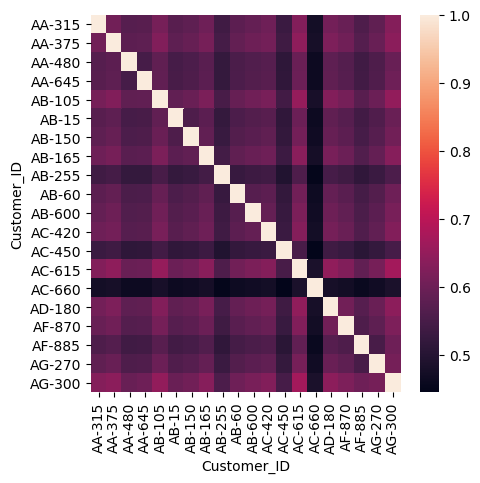

In [180]:
plt.figure(figsize= (5,5), dpi=100)
sns.heatmap(cust_dist.iloc[0:20,0:20])

Once we had our similarity matrix, then we could produce recommendations for each user and package all the recommendations into a data frame.

In [181]:
#an example of a customer with his recommended product list
cust_prod_pivot.T['AA-315'].sort_values(ascending=False)

Product_Name
Samsung Signal Booster, Cordless                  0.315789
Acco Index Tab, Durable                           0.315789
Fellowes Lockers, Single Width                    0.105263
Canon Wireless Fax, Digital                       0.105263
Cardinal Binding Machine, Recycled                0.052632
Smead Box, Industrial                             0.052632
Ikea Library with Doors, Mobile                   0.052632
Xerox Parchment Paper, Recycled                   0.000000
Elite Box Cutter, Steel                           0.000000
Eldon Stacking Tray, Erganomic                    0.000000
Eldon Trays, Blue                                 0.000000
Eldon Trays, Industrial                           0.000000
Eldon Trays, Single Width                         0.000000
Eldon Trays, Wire Frame                           0.000000
Elite Box Cutter, Easy Grip                       0.000000
Elite Box Cutter, High Speed                      0.000000
Elite Letter Opener, Easy Grip             

We now have a ranked list of products that similar customers have purchased, but we haven't taken into consideration yet whether our target customer already purchases any of those items. We want to recommend them items that they might like but haven't purchased before. So we will merge the list of ranked products with our target customer's purchase list and keep only the records for items that the customer has not purchased. These will be the items that we recommend to the customer.

In [182]:
recommendations={}
customers=list(df_emea['Customer_ID'].unique())

for customer in customers:
    similar_cust=list(cust_dist[customer].sort_values(ascending=False)[1:].head().index)
    sim_cust_prod=df_emea[df_emea['Customer_ID'].isin(similar_cust)]
    grouped=sim_cust_prod.groupby('Product_Name').agg({'Quantity':'sum'})
    ranked_products=grouped.sort_values('Quantity', ascending=False).reset_index()

    merged=pd.merge(ranked_products, pd.DataFrame(cust_prod_pivot.T[customer]), on='Product_Name')
    merged.columns=['Product_Name', 'Quantity', 'Purchased']
    recs=merged[merged['Purchased']==0].head()
    recommendations[customer]=list(recs['Product_Name'])




## Looping through the whole dataset

In [183]:
recommendations

{'AA-315': ['Rogers Trays, Wire Frame',
  'Acco Binder Covers, Clear',
  'Stiletto Trimmer, Steel',
  'Avery Hole Reinforcements, Recycled',
  'Stanley Sketch Pad, Easy-Erase'],
 'AA-375': ['Rogers Trays, Wire Frame',
  'Acco Binder Covers, Clear',
  'Stanley Sketch Pad, Easy-Erase',
  'SanDisk Keyboard, Programmable',
  'Motorola Smart Phone, Cordless'],
 'AA-480': ['Rogers Trays, Wire Frame',
  'SAFCO Executive Leather Armchair, Adjustable',
  'Acco Binder Covers, Clear',
  'Stanley Sketch Pad, Easy-Erase',
  'Hamilton Beach Blender, White'],
 'AA-645': ['Sanford Pens, Fluorescent',
  'Cuisinart Stove, Silver',
  'Hoover Toaster, Red',
  'Belkin Keyboard, Erganomic',
  'Acco Hole Reinforcements, Economy'],
 'AB-105': ['Breville Toaster, Black',
  'Stanley Sketch Pad, Fluorescent',
  'Stanley Pens, Blue',
  'Smead Box, Single Width',
  'SanDisk Keyboard, Programmable'],
 'AB-15': ['Rogers Trays, Wire Frame',
  'Acco Binder Covers, Clear',
  'Stanley Sketch Pad, Easy-Erase',
  'SanDisk

In [184]:
recommendations = {}
markets=list(df_gr['Market'].unique())
for market in markets:
    df_market=df_gr[df_gr.Market==market]
    prod_cust_pivot = df_market.pivot_table(values='Quantity',columns='Market_Customer_ID', index='Product_Name', aggfunc='sum').fillna(0)
    cust_prod_pivot=prod_cust_pivot.T
    cust_prod_pivot = cust_prod_pivot.div(cust_prod_pivot.sum(axis=1), axis=0)
    cust_dist = pd.DataFrame(1/(1 + squareform(pdist(cust_prod_pivot, 'euclidean'))), index=cust_prod_pivot.index, columns=cust_prod_pivot.index)

    customers = list(df_market['Market_Customer_ID'].unique())
    for customer in customers:
        similar_cust = list(cust_dist[customer].sort_values(ascending=False)[1:].head().index)
        sim_cust_prod = df_market[df_market['Market_Customer_ID'].isin(similar_cust)]
        grouped = sim_cust_prod.groupby('Product_Name').agg({'Quantity':'sum'})
        ranked_products = grouped.sort_values('Quantity', ascending=False).reset_index()

        merged = pd.merge(ranked_products, pd.DataFrame(cust_prod_pivot.T[customer]), on='Product_Name')
        merged.columns = ['Product_Name', 'Quantity', 'Purchased']
        recs = merged[merged['Purchased']==0].head()
        recommendations[customer] = list(recs['Product_Name'])

user_recs = pd.DataFrame.from_dict(recommendations, orient='index').reset_index()
user_recs.columns = ['Market_Customer_ID', 'Recommendation1', 'Recommendation2', 'Recommendation3', 'Recommendation4', 'Recommendation5']
user_recs.head()

,Market_Customer_ID,Recommendation1,Recommendation2,Recommendation3,Recommendation4,Recommendation5
0,APAC AA-10315,"Eldon Lockers, Blue","Kleencut Trimmer, Steel","Eldon Shelving, Blue","SanDisk Mouse, Programmable","Harbour Creations Swivel Stool, Red"
1,APAC AA-10375,"SAFCO Steel Folding Chair, Red","Eldon Lockers, Blue","Tenex Box, Industrial","Green Bar Note Cards, Premium","SanDisk Memory Card, USB"
2,APAC AA-10480,"SAFCO Steel Folding Chair, Red","Xerox Computer Printout Paper, Multicolor","Cameo Interoffice Envelope, Set of 50","Fiskars Scissors, Steel","Ibico Binder Covers, Recycled"
3,APAC AA-10645,"SAFCO Steel Folding Chair, Red","Kraft Clasp Envelope, with clear poly window","Eaton Memo Slips, Multicolor","Tenex Box, Industrial","Eldon Lockers, Blue"
4,APAC AB-10015,"SAFCO Steel Folding Chair, Red","Tenex Box, Industrial","Eldon Lockers, Blue","Kraft Business Envelopes, Set of 50","SanDisk Memory Card, USB"


In [185]:
df=pd.merge(df,user_recs,on='Market_Customer_ID')

In [198]:
df[df.Market=='Africa']

,Date,Customer_ID,Customer_Name,Segment,City,Country,Market,Product_ID,Category,Sub_Category,...,Frequency_qcut,Recency_qcut,Monetary_qcut,label,Market_Customer_ID,Recommendation1,Recommendation2,Recommendation3,Recommendation4,Recommendation5
0,2011-01-01,TB-11280,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,OFF-TEN-10000025,Office Supplies,Storage,...,2,1,2,2,Africa TB-11280,"Green Bar Message Books, Multicolor","Stanley Pencil Sharpener, Water Color","Office Star Swivel Stool, Adjustable","Boston Markers, Easy-Erase","Nokia Speaker Phone, Cordless"
1,2012-08-14,TB-11280,Toby Braunhardt,Consumer,Bamako,Mali,Africa,TEC-STA-10004536,Technology,Machines,...,2,1,2,2,Africa TB-11280,"Green Bar Message Books, Multicolor","Stanley Pencil Sharpener, Water Color","Office Star Swivel Stool, Adjustable","Boston Markers, Easy-Erase","Nokia Speaker Phone, Cordless"
88,2012-09-02,AT-735,Annie Thurman,Consumer,Rabat,Morocco,Africa,OFF-CAR-10001358,Office Supplies,Binders,...,1,2,1,2,Africa AT-735,"Eaton Note Cards, Premium","Fellowes Box, Blue","Nokia Speaker Phone, Cordless","Green Bar Note Cards, Premium","StarTech Card Printer, Wireless"
272,2011-01-02,DK-3150,David Kendrick,Corporate,Luanda,Angola,Africa,OFF-FEL-10001541,Office Supplies,Storage,...,3,1,2,2,Africa DK-3150,"Stanley Pencil Sharpener, Fluorescent","Fellowes File Cart, Wire Frame","Tenex Photo Frame, Durable","Memorex Keyboard, Programmable","Sharp Wireless Fax, Laser"
273,2012-12-06,DK-3150,David Kendrick,Corporate,Casablanca,Morocco,Africa,OFF-BOS-10003113,Office Supplies,Art,...,3,1,2,2,Africa DK-3150,"Stanley Pencil Sharpener, Fluorescent","Fellowes File Cart, Wire Frame","Tenex Photo Frame, Durable","Memorex Keyboard, Programmable","Sharp Wireless Fax, Laser"
274,2014-04-11,DK-3150,David Kendrick,Corporate,Kolwezi,Democratic Republic of the Congo,Africa,OFF-FIS-10003234,Office Supplies,Supplies,...,3,1,2,2,Africa DK-3150,"Stanley Pencil Sharpener, Fluorescent","Fellowes File Cart, Wire Frame","Tenex Photo Frame, Durable","Memorex Keyboard, Programmable","Sharp Wireless Fax, Laser"
275,2012-02-15,DK-3150,David Kendrick,Corporate,Rustenburg,South Africa,Africa,OFF-ELD-10003918,Office Supplies,Storage,...,3,1,2,2,Africa DK-3150,"Stanley Pencil Sharpener, Fluorescent","Fellowes File Cart, Wire Frame","Tenex Photo Frame, Durable","Memorex Keyboard, Programmable","Sharp Wireless Fax, Laser"
425,2013-11-21,PO-8850,Patrick O'Brill,Consumer,Calabar,Nigeria,Africa,OFF-HAM-10003992,Office Supplies,Appliances,...,1,2,2,2,Africa PO-8850,"Eaton Computer Printout Paper, 8.5 x 11","Apple Smart Phone, Full Size","Stiletto Ruler, Easy Grip","Acco Hole Reinforcements, Durable","GlobeWeis Clasp Envelope, Recycled"
426,2013-02-27,PO-8850,Patrick O'Brill,Consumer,Pretoria,South Africa,Africa,TEC-HP -10003345,Technology,Copiers,...,1,2,2,2,Africa PO-8850,"Eaton Computer Printout Paper, 8.5 x 11","Apple Smart Phone, Full Size","Stiletto Ruler, Easy Grip","Acco Hole Reinforcements, Durable","GlobeWeis Clasp Envelope, Recycled"
427,2013-02-27,PO-8850,Patrick O'Brill,Consumer,Pretoria,South Africa,Africa,OFF-BIC-10003654,Office Supplies,Art,...,1,2,2,2,Africa PO-8850,"Eaton Computer Printout Paper, 8.5 x 11","Apple Smart Phone, Full Size","Stiletto Ruler, Easy Grip","Acco Hole Reinforcements, Durable","GlobeWeis Clasp Envelope, Recycled"


In [199]:
df_recommendations=df.groupby(['Customer_ID','Customer_Name', 'Market','Recommendation1', 'Recommendation2',
       'Recommendation3', 'Recommendation4', 'Recommendation5'], as_index=False).agg({'Profit':'sum'})
       

In [200]:
df_recommendations.drop('Profit', inplace=True, axis=1)

In [201]:
df_recommendations.sort_values(by='Market')

,Customer_ID,Customer_Name,Market,Recommendation1,Recommendation2,Recommendation3,Recommendation4,Recommendation5
0,AA-10315,Alex Avila,APAC,"Eldon Lockers, Blue","Kleencut Trimmer, Steel","Eldon Shelving, Blue","SanDisk Mouse, Programmable","Harbour Creations Swivel Stool, Red"
2115,JC-15340,Jasper Cacioppo,APAC,"SAFCO Steel Folding Chair, Red","Tenex Box, Industrial","Eldon Lockers, Blue","Kraft Business Envelopes, Set of 50","SanDisk Memory Card, USB"
2103,JB-16045,Julia Barnett,APAC,"Elite Letter Opener, High Speed","Stiletto Shears, High Speed","SAFCO Steel Folding Chair, Red","Kraft Business Envelopes, Set of 50","Ibico Binder Covers, Recycled"
2099,JB-16000,Joy Bell-,APAC,"Wilson Jones Index Tab, Recycled","SAFCO Steel Folding Chair, Red","Tenex Box, Industrial","Avery Index Tab, Clear","Fiskars Scissors, Steel"
2095,JB-15925,Joni Blumstein,APAC,"SAFCO Steel Folding Chair, Red","Eldon Lockers, Blue","Cardinal 3-Hole Punch, Durable","Tenex Box, Industrial","SanDisk Memory Card, USB"
2091,JB-15400,Jennifer Braxton,APAC,"SAFCO Steel Folding Chair, Red","Tenex Box, Industrial","Eldon Lockers, Blue","Fellowes Shelving, Industrial","Cisco Signal Booster, VoIP"
2085,JA-15970,Joseph Airdo,APAC,"Xerox Computer Printout Paper, Recycled","SAFCO Steel Folding Chair, Red","Motorola Speaker Phone, Cordless","Stanley Pencil Sharpener, Water Color","Acme Ruler, Serrated"
2077,IM-15070,Irene Maddox,APAC,"Office Star Swivel Stool, Adjustable","SAFCO Steel Folding Chair, Red","Deflect-O Door Stop, Black","Elite Trimmer, Easy Grip","Kraft Business Envelopes, Set of 50"
2073,IM-15055,Ionia McGrath,APAC,"GlobeWeis Clasp Envelope, Security-Tint","Rubbermaid Stacking Tray, Durable","Avery Round Labels, 5000 Label Set","Bush Stackable Bookrack, Mobile","Rubbermaid Door Stop, Duo Pack"
2067,IL-15100,Ivan Liston,APAC,"Harbour Creations Rocking Chair, Set of Two","Logitech Flash Drive, USB","Avery 3-Hole Punch, Recycled","SAFCO Steel Folding Chair, Red","Sharp Personal Copier, Digital"


In [202]:

df_recommendations.to_csv('../csv/DF_Recommendations.csv', sep=",", index=False)